# Ping experiment plotting scripts

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from numpy import percentile

In [8]:
ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
!ROOT=$ROOT
data_file = f"{ROOT}/data/Apr06-ping/ping.log"
data = {}

# Clean the log file
with open(data_file, "r") as f:
    msg = None
    for line in f.readlines():
        if line.count("DP[Time]:") > 0:
            data[msg].append(int(line.split("DP[Time]:")[1].strip()))
        if line.count("DP[Message]:") == 1:
            msg = int(line.split("DP[Message]:")[1].strip())
            data[msg] = []

In [9]:
# Process the data into percentiles
def ping_process(data):
    points = [1,10,50,90,95,99,99.1,99.9,99.99,99.999,99.9999,100]

    out_data = {}
    for k in data.keys():
        y = list(percentile(data[k], points))
        out_data[k] = {"x": points,"y":y}
    return out_data

# Create the processed data
processed_data = ping_process(data)

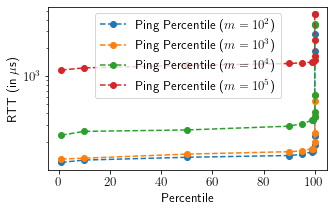

In [10]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(5, 3)
plt.rcParams.update({'font.size': 13})

for i in processed_data.keys():
    x = processed_data[i]["x"]
    y = processed_data[i]["y"]
    plt.plot(x,y, label=f"Ping Percentile ($m=10^{int(math.log10(i))}$)", linestyle='--', marker='o')
plt.legend()
plt.yscale("log")
plt.xlabel("Percentile")
plt.ylabel("RTT (in $\\mu$s)")
# plt.show()
plt.savefig(f"{ROOT}/data/export/Ping-AWS.pdf", bbox_inches='tight')

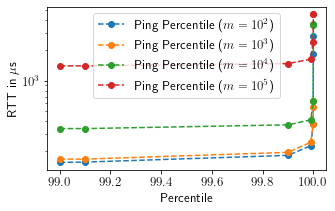

In [11]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(5, 3)
plt.rcParams.update({'font.size': 13})

for i in processed_data.keys():
    x = processed_data[i]["x"][5:]
    y = processed_data[i]["y"][5:]
    plt.plot(x,y, label=f"Ping Percentile ($m=10^{int(math.log10(i))}$)", linestyle='--', marker='o')
plt.legend()
plt.yscale("log")
plt.xlabel("Percentile")
plt.ylabel("RTT in $\\mu$s")
# plt.show()
plt.savefig(f"{ROOT}/data/export/Ping-AWS-zoom.pdf", bbox_inches="tight")

In [12]:
%%bash
cd "/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
ls data/export/*.pdf
cp data/export/*.pdf ../Overleaf/Apollo/Figures/

data/export/Ping-AWS.pdf
data/export/Ping-AWS-zoom.pdf
